In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO
import seaborn as sns

In [25]:
from zipfile import ZipFile
z = ZipFile('names.zip')
x = z.extractall('names/')

None


In [10]:
import os
path = os.getcwd()
z = ""
def read_text_file(file_path,name):
    f = open(file_path, 'r')
    lines = f.readlines()
    add = ""
    for line in lines:
        content = f"{name},{line}"
        add = add+content
    return add
for file in os.listdir('./names'):    
    if file.endswith(".txt"):
        file_path = f"{path}\\names\\{file}"
        name = file[3:7]
        z= z + (read_text_file(file_path,name))
df1 = pd.read_csv(StringIO(z),encoding='utf-8', engine='python', header=None)

In [11]:
df1.columns = ['year','Name','gender','count']
df1.head()

,year,Name,gender,count
0,1880,Mary,F,7065
1,1880,Anna,F,2604
2,1880,Emma,F,2003
3,1880,Elizabeth,F,1939
4,1880,Minnie,F,1746


In [12]:
df1['gender'].value_counts()

F    1192115
M     828748
Name: gender, dtype: int64

In [14]:
df2 = pd.pivot_table(index='year',columns='gender',data=df1,aggfunc=np.sum,values='count')
df2.head()

gender,F,M
year,,
1880,90994,110490
1881,91953,100738
1882,107847,113686
1883,112319,104625
1884,129019,114442


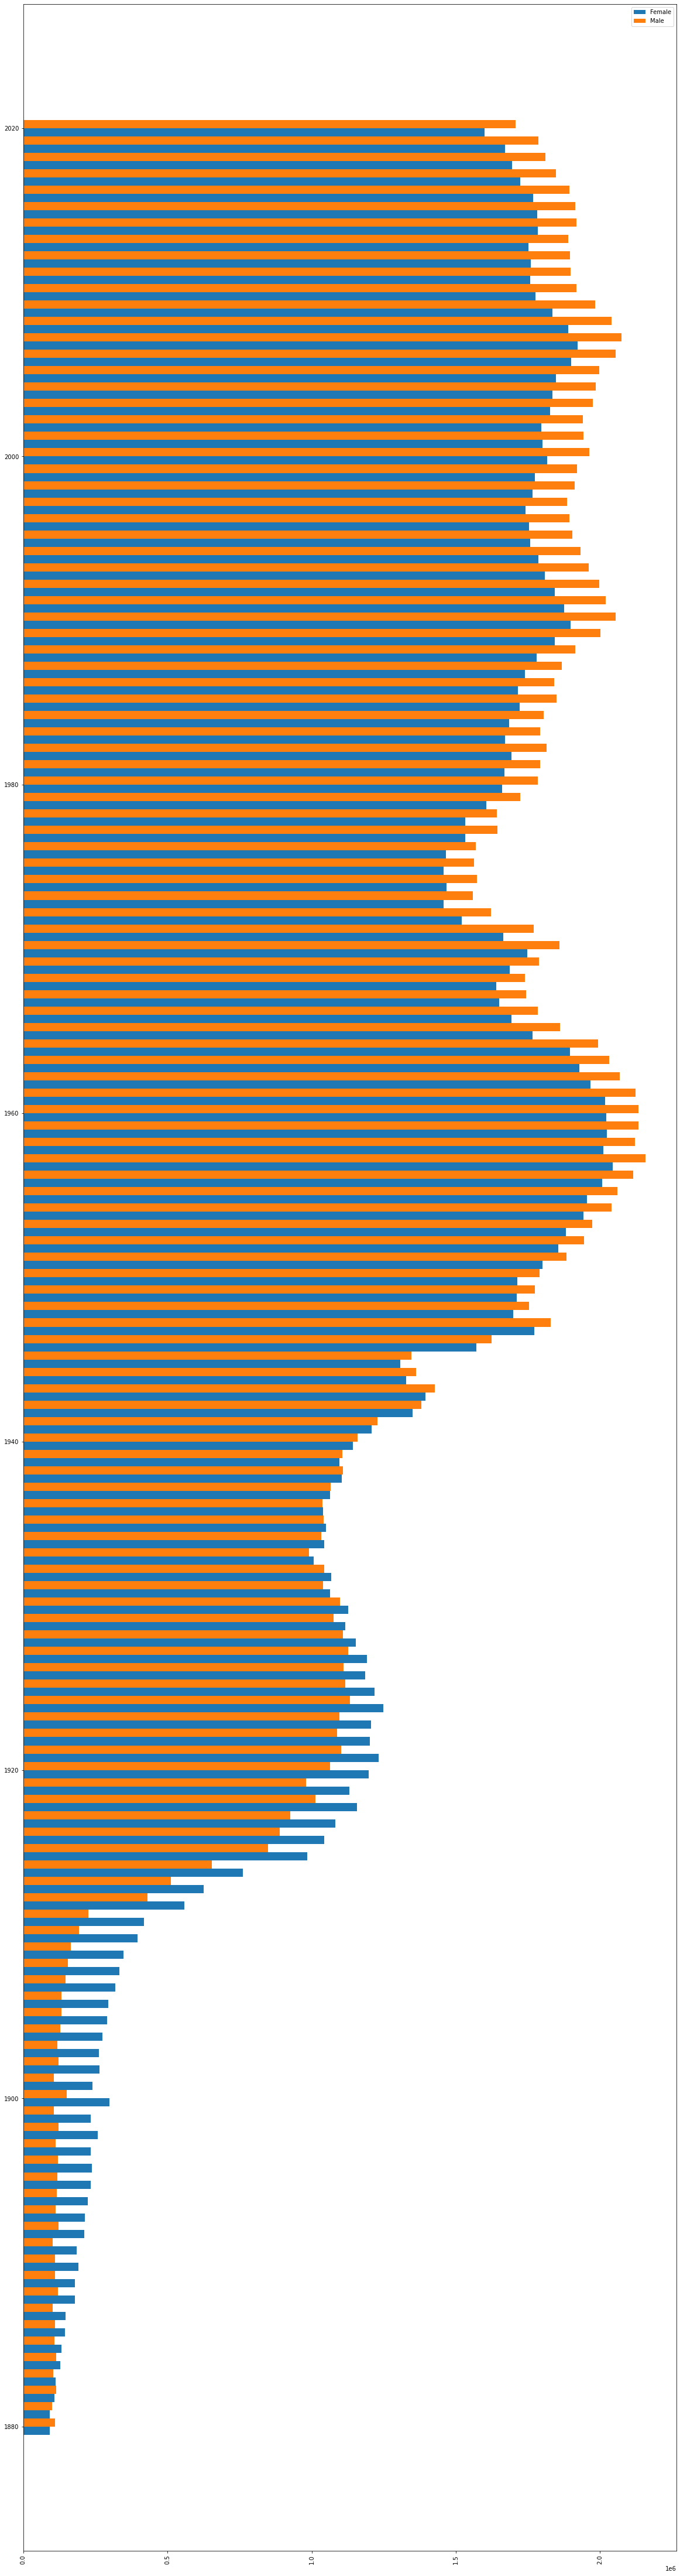

In [7]:
width = 0.5
x = df2.index
y1 = df2['F']
y2 = df2['M']
plt.figure(figsize=(20, 80))
plt.barh(x-0.25, y1, width, label='Female')
plt.barh(x+0.25, y2, width, label='Male')
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [53]:
z1 = df1.groupby(by=df1[df1['gender']=='F']['year'])['count'].sum()
z2 = df1.groupby(by=df1[df1['gender']=='M']['year'])['count'].sum()
print(z1.values)

[  90994   91953  107847  112319  129019  133055  144533  145982  178622
  178366  190377  185480  212339  212905  222922  233627  237918  234200
  258770  233022  299794  239345  264075  261970  275362  291619  295300
  318566  334314  347230  396505  418309  558120  624547  761582  983860
 1044342 1081273 1157637 1130131 1198294 1233061 1200998 1206389 1248892
 1217405 1185404 1192415 1153318 1116552 1125950 1064707 1067123 1007891
 1044195 1048539 1040354 1063991 1103426 1096611 1143447 1208065 1350680
 1395243 1327189 1307051 1571260 1772713 1697839 1710872 1713063 1800874
 1854334 1881306 1942035 1955320 2007616 2044573 2011274 2022957 2022012
 2017759 1966595 1927364 1894855 1765096 1692022 1650959 1640276 1687012
 1748163 1663675 1521195 1458221 1467470 1457887 1465158 1533168 1531868
 1605342 1660388 1667987 1693322 1670560 1683662 1720695 1715380 1738472
 1780572 1843445 1898296 1874814 1843688 1808821 1785473 1758338 1752740
 1740454 1766656 1773495 1815542 1800081 1796311 18

In [46]:
year = set(df1['year'])
yrs = [x for x in year]
yrs

[1880,
 1881,
 1882,
 1883,
 1884,
 1885,
 1886,
 1887,
 1888,
 1889,
 1890,
 1891,
 1892,
 1893,
 1894,
 1895,
 1896,
 1897,
 1898,
 1899,
 1900,
 1901,
 1902,
 1903,
 1904,
 1905,
 1906,
 1907,
 1908,
 1909,
 1910,
 1911,
 1912,
 1913,
 1914,
 1915,
 1916,
 1917,
 1918,
 1919,
 1920,
 1921,
 1922,
 1923,
 1924,
 1925,
 1926,
 1927,
 1928,
 1929,
 1930,
 1931,
 1932,
 1933,
 1934,
 1935,
 1936,
 1937,
 1938,
 1939,
 1940,
 1941,
 1942,
 1943,
 1944,
 1945,
 1946,
 1947,
 1948,
 1949,
 1950,
 1951,
 1952,
 1953,
 1954,
 1955,
 1956,
 1957,
 1958,
 1959,
 1960,
 1961,
 1962,
 1963,
 1964,
 1965,
 1966,
 1967,
 1968,
 1969,
 1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020]

In [63]:
df1.head()

,year,Name,gender,count
0,1880,Mary,F,7065
1,1880,Anna,F,2604
2,1880,Emma,F,2003
3,1880,Elizabeth,F,1939
4,1880,Minnie,F,1746


In [98]:
df3 = pd.pivot_table(index='Name',columns='gender',data=df1,aggfunc=np.sum,values='count',fill_value=0)
df3

gender,F,M
Name,,
Aaban,0,120
Aabha,46,0
Aabid,0,16
Aabidah,5,0
Aabir,0,10
...,...,...
Zyvion,0,5
Zyvon,0,7
Zyyanna,6,0


# First 100 Female Names

In [93]:
n1 = df1.groupby(by=df1[df1['gender']=='F']['Name'])['count'].sum()
n1 = pd.DataFrame(n1,index=None)
n1.sort_values(by='count',ascending=False).head(100)

,count
Name,
Mary,4130314
Elizabeth,1653689
Patricia,1572554
Jennifer,1468730
Linda,1453408
...,...
Marilyn,371746
Danielle,368589
Diana,361882


# First 100 Male Names

In [94]:
n2 = df1.groupby(by=df1[df1['gender']=='M']['Name'])['count'].sum()
n2 = pd.DataFrame(n2,index=None)
n2.sort_values(by='count',ascending=False).head(100)

,count
Name,
James,5190161
John,5142243
Robert,4829631
Michael,4383488
William,4143886
...,...
Vincent,347608
Howard,345545
Fred,343195
